In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
# Step 2: Load Dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
# Step 3: Data Cleaning
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [ ]:
# Fill missing values with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [ ]:
# Drop customerID (not a predictive feature)
df.drop('customerID', axis=1, inplace=True)

In [ ]:
# Convert target variable 'Churn' to binary (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print("\nData Cleaning Done!")
print(df.info())


Data Cleaning Done!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     704

In [ ]:
# Step 4: Encode Categorical Variables
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", cat_cols.tolist())


Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("\nEncoding Done! New Shape:", df_encoded.shape)


Encoding Done! New Shape: (7043, 31)


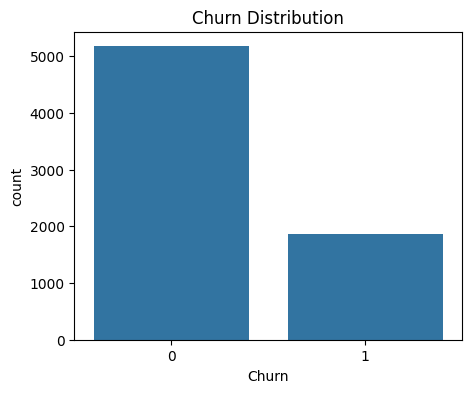

In [ ]:
# Step 5: Exploratory Data Analysis (EDA)
# Churn distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

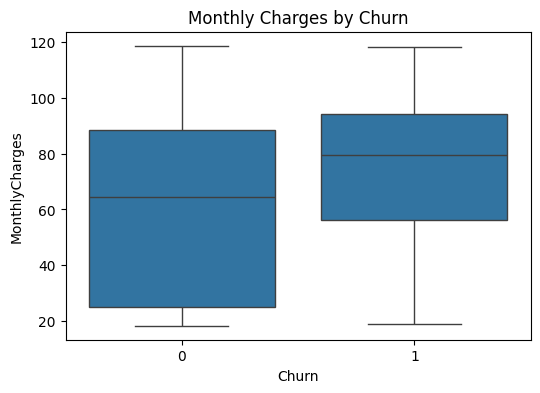

In [ ]:
# MonthlyCharges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

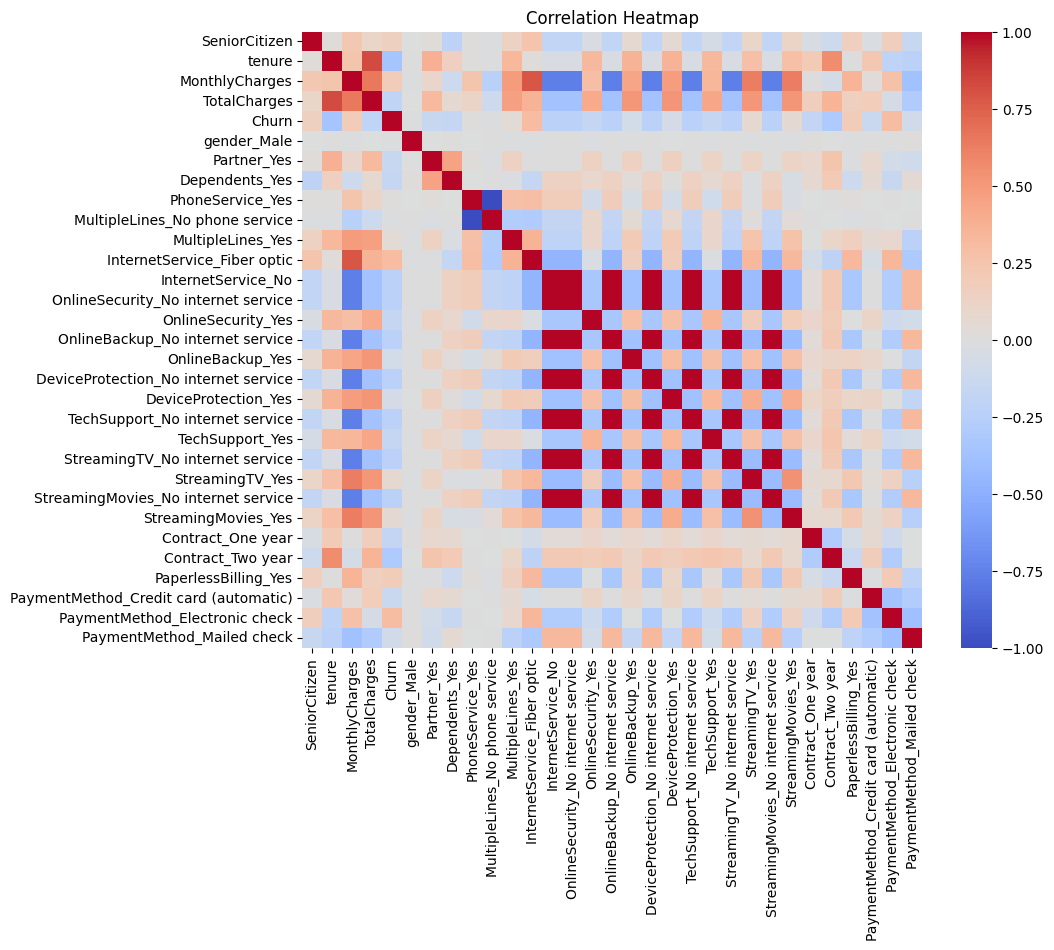

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Step 6: Split Data into Train/Test
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3738,0,35,49.20,1701.65,True,False,False,False,True,False,...,False,True,False,True,False,False,False,False,True,False
3151,0,15,75.10,1151.55,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4860,0,13,40.55,590.35,True,True,True,False,True,False,...,False,False,False,False,False,True,False,False,False,True
3867,0,26,73.50,1905.70,False,True,False,True,False,False,...,False,True,False,True,False,True,True,True,False,False
3810,0,1,44.55,44.55,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,0,71,109.25,7707.70,False,True,False,True,False,True,...,False,True,False,True,False,True,False,False,True,False
6227,0,2,46.05,80.35,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4673,1,25,102.80,2660.20,False,False,False,True,False,True,...,False,True,False,True,False,False,True,False,False,True
2710,0,24,20.40,482.80,False,True,False,True,False,False,...,True,False,True,False,True,False,False,True,False,False


In [ ]:
X_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
437,0,72,114.05,8468.20,True,True,True,True,False,True,...,False,True,False,True,False,True,True,True,False,False
2280,1,8,100.15,908.55,False,False,False,True,False,True,...,False,True,False,True,False,False,True,True,False,False
2235,0,41,78.35,3211.20,False,True,True,True,False,True,...,False,True,False,False,True,False,True,True,False,False
4460,0,18,78.20,1468.75,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3761,0,72,82.65,5919.35,False,True,False,True,False,True,...,False,True,False,True,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,0,49,87.20,4345.00,False,True,True,True,False,False,...,False,True,False,True,True,False,True,False,False,True
4439,0,28,20.30,487.95,True,True,True,True,False,False,...,True,False,True,False,False,True,True,True,False,False
3857,0,5,20.65,93.55,True,False,False,True,False,False,...,True,False,True,False,False,False,False,False,False,False
4758,0,56,19.70,1051.90,False,False,False,True,False,False,...,True,False,True,False,False,True,False,False,False,False


In [ ]:
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (5634, 30)
Testing set: (1409, 30)


In [ ]:
# Step 7: Train Models (Decision Tree & Gradient Boosting)
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [ ]:
# Step 8: Model Evaluation

def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Model: Decision Tree
Accuracy: 0.7416607523066004
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1035
           1       0.51      0.49      0.50       374

    accuracy                           0.74      1409
   macro avg       0.67      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409



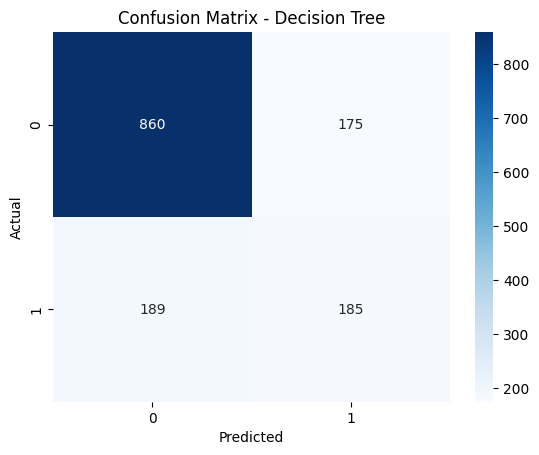

In [ ]:
evaluate_model(y_test, y_pred_dt, "Decision Tree")


Model: Gradient Boosting
Accuracy: 0.7991483321504613
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



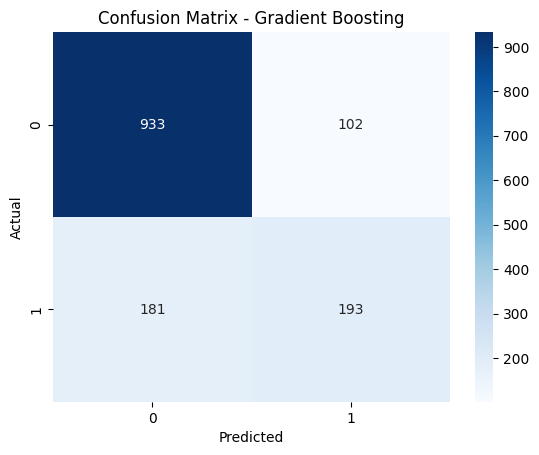

In [ ]:
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

In [ ]:
# Step 9: Cross-Validation & Hyperparameter Tuning
params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [ ]:
grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=params,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)
grid.fit(X_train, y_train)
print("\nBest Parameters:", grid.best_params_)
best_gb = grid.best_estimator_


Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}



Model: Tuned Gradient Boosting
Accuracy: 0.7984386089425124
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



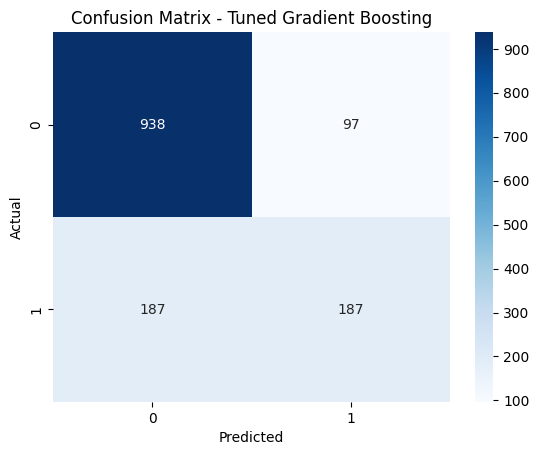

In [ ]:
# Evaluate best model
y_pred_best = best_gb.predict(X_test)
evaluate_model(y_test, y_pred_best, "Tuned Gradient Boosting")

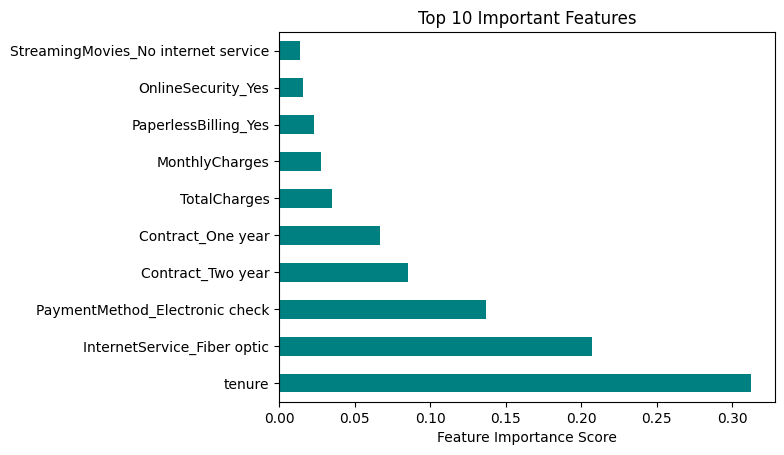

In [ ]:
# Step 10: Feature Importance Visualization
feat_importance = pd.Series(best_gb.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.show()
